# Implementation of LHAASO mask for integral over line of sight

In [1]:
from pylab import *

## Old mask

In [256]:
data = np.genfromtxt('LHAASO_old_mask/LHAASO_old.txt')
l = np.arange(15.05, 235, 0.1)
b = np.arange(-4.95, 5, 0.1)
index = np.zeros((2200, 100))
length = np.arange(1,220001)
for i in range(0,2200):
    for j in range(0,100):
        index[i,j] = int(length[j + (100*i)])

In [257]:
a = np.zeros((2200, 100))
for i in range(0,2200-1):
    for j in range(0,100-1):
        value = index[i,j]
        a[i,j] = data[:,2][int(value)]
        
#np.savetxt('LHAASO_oldmask_matrix.txt', a)

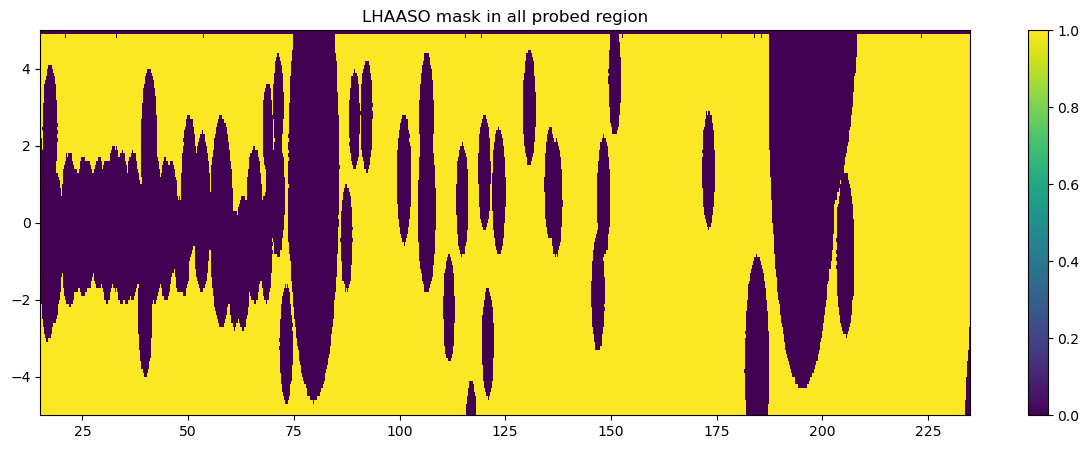

In [258]:
fig, ax = plt.subplots(figsize=(15, 5))
im = ax.pcolormesh(l, b, a.T)
fig.colorbar(im)
ax.set_title('LHAASO mask in all probed region')
plt.show()

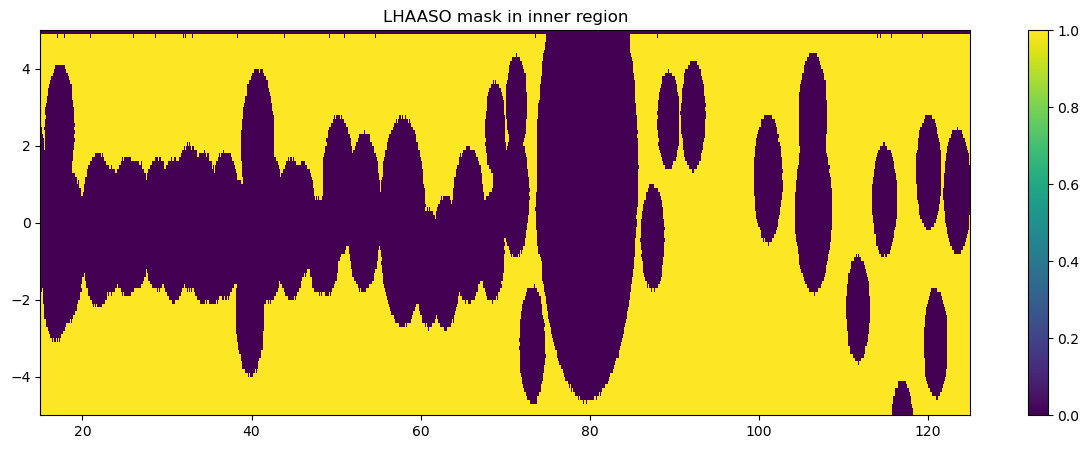

Size of matrix: 100 x 1100


In [263]:
fig, ax = plt.subplots(figsize=(15, 5))
im = ax.pcolormesh(l[0:1100], b, a.T[:,0:1100])
fig.colorbar(im)
ax.set_title('LHAASO mask in inner region')
plt.show()

print('Size of matrix:', len(b), 'x', len(l[0:1100]) )

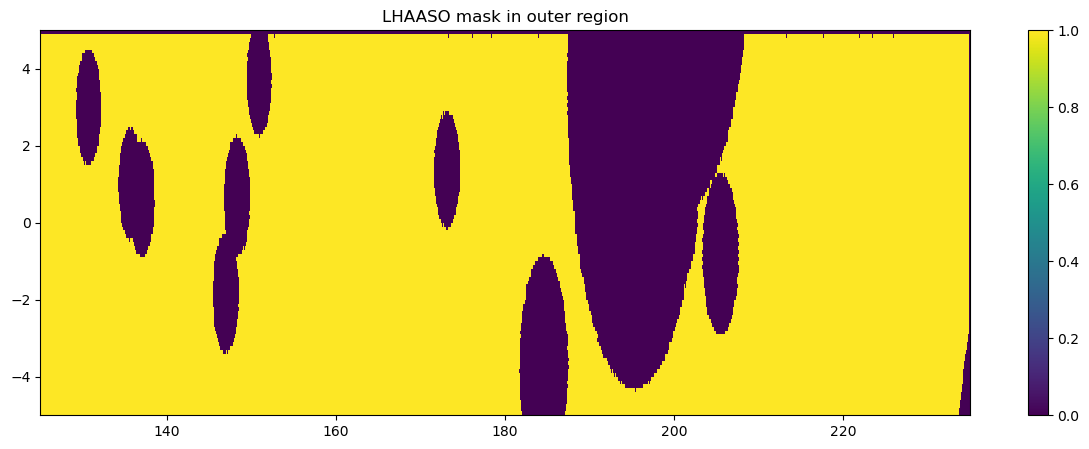

Size of matrix: 100 x 1100


In [49]:
fig, ax = plt.subplots(figsize=(15, 5))
im = ax.pcolormesh(l[1100::], b, a.T[:,1100::])
fig.colorbar(im)
ax.set_title('LHAASO mask in outer region')
plt.show()

print('Size of matrix:', len(b), 'x', len(l[1100::]) )

In [119]:
new_l = np.arange(15.05, 235, 1.1)
new_array = np.zeros((200, 100))
for i in range(0,200):
    for j in range(0,100):
        new_array[i,j] = a[i * 11, j]

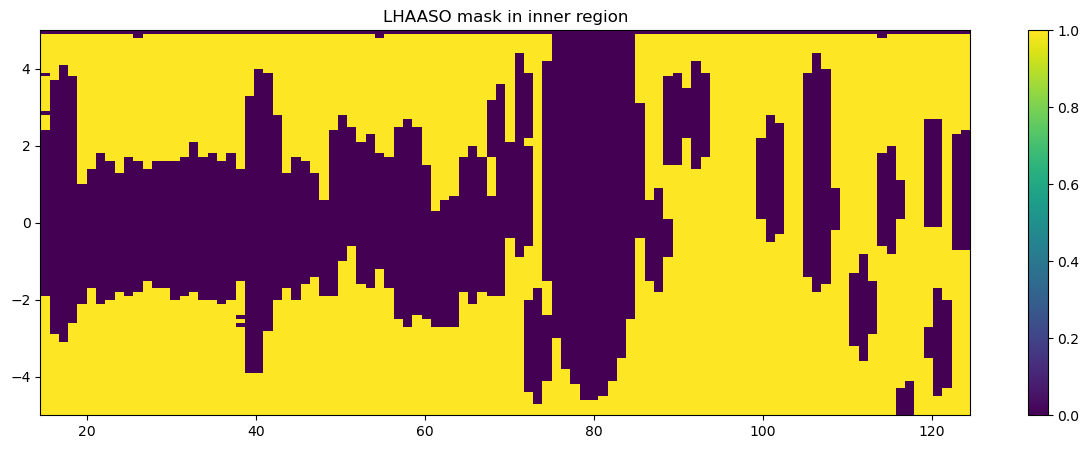

Size of matrix: 100 x 100


In [120]:
fig, ax = plt.subplots(figsize=(15, 5))
im = ax.pcolormesh(new_l[0:100], b, new_array.T[:,0:100])
fig.colorbar(im)
ax.set_title('LHAASO mask in inner region')
plt.show()

print('Size of matrix:', len(b), 'x', len(new_l[0:100]) )
np.savetxt('LHAASO_oldmask_innerGalaxy.txt', new_array[0:100,:])

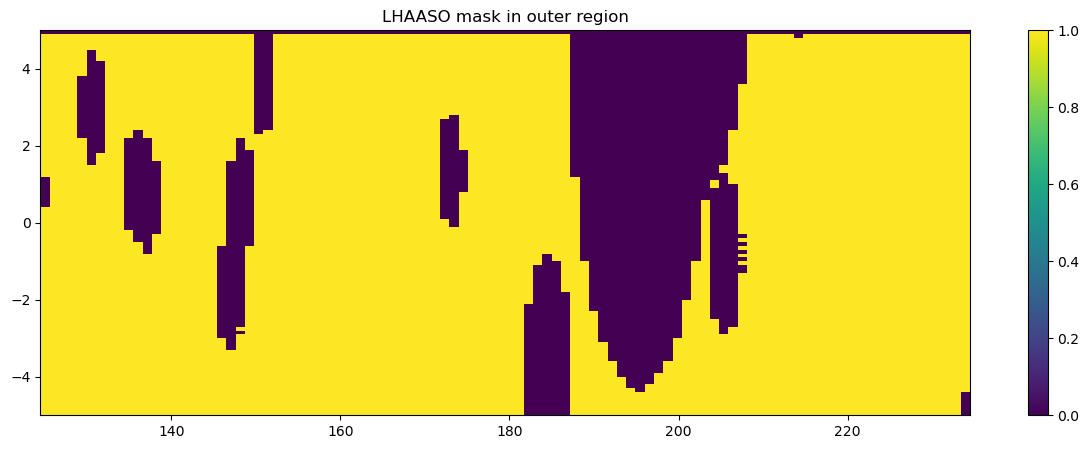

Size of matrix: 100 x 100


In [121]:
fig, ax = plt.subplots(figsize=(15, 5))
im = ax.pcolormesh(new_l[100::], b, new_array.T[:,100::])
fig.colorbar(im)
ax.set_title('LHAASO mask in outer region')
plt.show()

print('Size of matrix:', len(b), 'x', len(new_l[0:100]) )
np.savetxt('LHAASO_oldmask_outerGalaxy.txt', new_array[100::,:])

In [112]:
print('Inner Galaxy:', min(new_l[0:100]), 'to', max(new_l[0:100]))
print('Outer Galaxy:', min(new_l[100::]), 'to', max(new_l[100::]))

Inner Galaxy: 15.05 to 123.95000000000014
Outer Galaxy: 125.05000000000014 to 233.95000000000027


## New mask

In [220]:
with open('LHAASO_new_mask/VT1R2.m','r') as f: text=f.read()
for rep in (('{','['),('}',']')):text=text.replace(rep[0],rep[1])
array=eval(text)

innerGalaxy = np.zeros((221, 201))
l_coord = np.zeros(221)
b_coord = np.zeros(201)
for i in range(0, 221):
    l_coord[i] = array[i][0][0][0]
    for j in range(0, 201):
        b_coord[j] = array[0][j][0][1]
        innerGalaxy[i, j] = array[i][j][1]

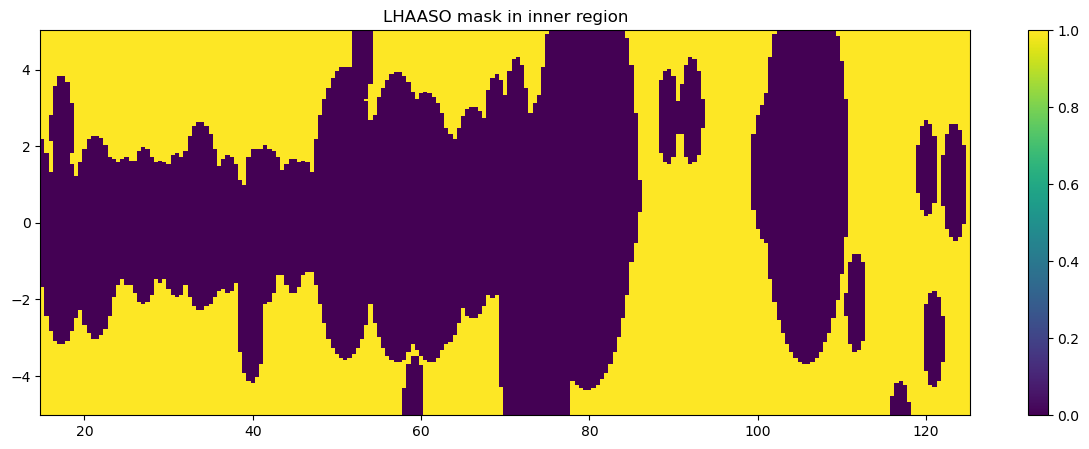

Size of matrix: 201 x 221


In [221]:
fig, ax = plt.subplots(figsize=(15, 5))
im = ax.pcolormesh(l_coord, b_coord, innerGalaxy.T)
fig.colorbar(im)
ax.set_title('LHAASO mask in inner region')
plt.show()

print('Size of matrix:', len(b_coord), 'x', len(l_coord) )

In [223]:
with open('LHAASO_new_mask/VT2R2.m','r') as f: text=f.read()
for rep in (('{','['),('}',']')):text=text.replace(rep[0],rep[1])
array=eval(text)

outerGalaxy = np.zeros((251, 201))
l_coord = np.zeros(251)
b_coord = np.zeros(201)
for i in range(0, 251):
    l_coord[i] = array[i][0][0][0]
    for j in range(0, 201):
        b_coord[j] = array[0][j][0][1]
        outerGalaxy[i, j] = array[i][j][1]

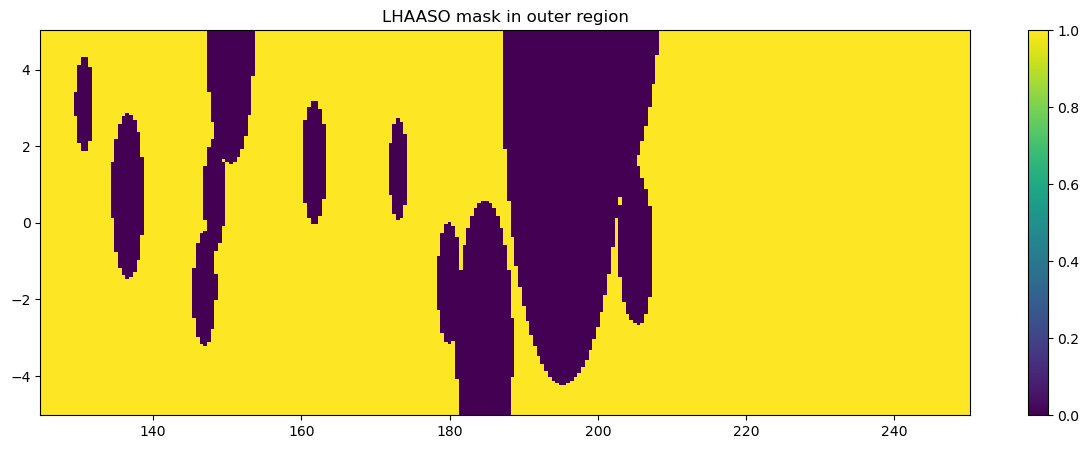

Size of matrix: 201 x 251


In [224]:
fig, ax = plt.subplots(figsize=(15, 5))
im = ax.pcolormesh(l_coord, b_coord, outerGalaxy.T)
fig.colorbar(im)
ax.set_title('LHAASO mask in outer region')
plt.show()

print('Size of matrix:', len(b_coord), 'x', len(l_coord) )

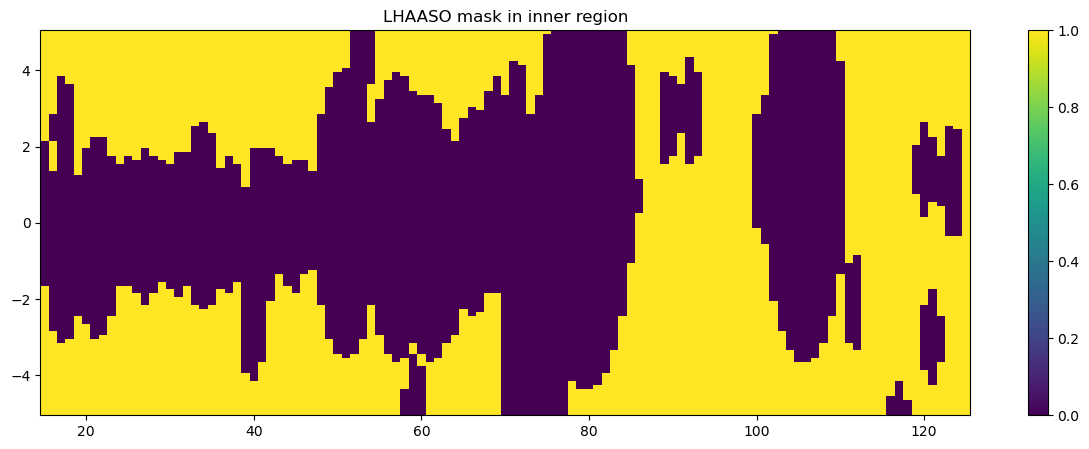

Size of matrix: 101 x 111


In [236]:
new_l_coord = np.arange(15., 126, 1)
new_b_coord = np.arange(-5., 5.1, 0.1)

l_coord_rad = np.zeros(len(new_l_coord))
b_coord_rad = np.zeros(len(new_b_coord))
new_innerGalaxy = np.zeros((111, 101))
for i in range(0,111):
    l_coord_rad[i] = math.radians(new_l_coord[i])
    for j in range(0,101):
        b_coord_rad[j] = math.radians(new_b_coord[j])
        new_innerGalaxy[i,j] = innerGalaxy[i * 2, j * 2]
        
fig, ax = plt.subplots(figsize=(15, 5))
im = ax.pcolormesh(new_l_coord, new_b_coord, new_innerGalaxy.T)
fig.colorbar(im)
ax.set_title('LHAASO mask in inner region')
plt.show()

print('Size of matrix:', len(new_b_coord), 'x', len(new_l_coord) )
np.savetxt('LHAASO_newmask_innerGalaxy.txt', new_innerGalaxy)
np.savetxt('b_coord.txt', b_coord_rad)
np.savetxt('l_coord_innerGalaxy.txt', l_coord_rad)

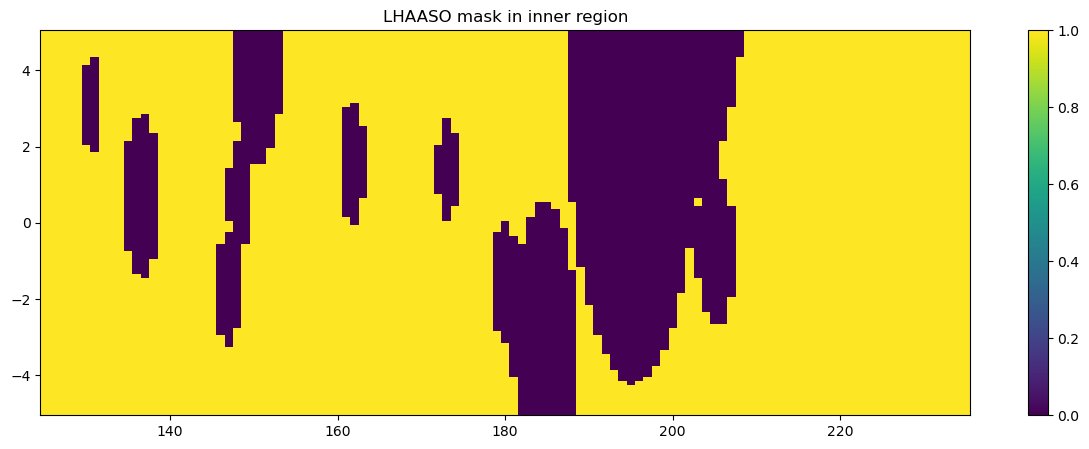

Size of matrix: 101 x 111


In [243]:
new_l_coord = np.arange(125., 236, 1)
new_b_coord = np.arange(-5., 5.1, 0.1)

l_coord_rad = np.zeros(len(new_l_coord))
new_outerGalaxy = np.zeros((111, 101))
for i in range(0,111):
    l_coord_rad[i] = math.radians(new_l_coord[i])
    for j in range(0,101):
        new_outerGalaxy[i,j] = outerGalaxy[i * 2, j * 2]
        
fig, ax = plt.subplots(figsize=(15, 5))
im = ax.pcolormesh(new_l_coord, new_b_coord, new_outerGalaxy.T)
fig.colorbar(im)
ax.set_title('LHAASO mask in inner region')
plt.show()

print('Size of matrix:', len(new_b_coord), 'x', len(new_l_coord) )
np.savetxt('LHAASO_newmask_outerGalaxy.txt', new_outerGalaxy)
np.savetxt('l_coord_outerGalaxy.txt', l_coord_rad)